# Model Doğrulama Yöntemleri:

# Holdout Yöntemi:
bu yöntemde veri seti 2/3 ü eğitilmek için ayrılır. 1/3 ü ise test için ayrılır.

# K Katlı Çağraz Doğrulama (k fold cross validation): 
Bu yöntemde yine eğitim ve test seti olarak veriler ikiye ayrılır. Holdout dan farkı bunu ayırma işleminde k kadar ayırmasıdır. Burada seçilen bir parça dışarıda bırakılır kalan parçalarla oluşturulan model geride kalan bu parça ile test edilir. Bu yöntem sırayla diğer parçalar için de uygulanır böylelikle her kombinasyon denenmiş olur ve kombinasyon dışı kalan parça bu kombinasyonlarla test edilir.

# Leave One Out :
N tane alt küme seçilir ( küme gözlem sayısına eşittir.). Bu N kümede her birinde bir tane gözlem  dışarıda bırakılır. Diğerleriyle test hatası hesaplanır. Yani model n-1 adet gözlem ile eğitilir ve diğer dışarıda kalan 1 tane ile eğitilir.

# Bootstap:

Her bir işlemde yerine koymalı olarak örneklemler seçilir. Ve bu örneklemlerin hatalarının ortalaması alınır. Ve bu şekilde örneklemin test hataları belirlenir.

### Bast Doğrusal Regresyon:

In [6]:
import pandas as pd
ad = pd.read_csv("Advertising.csv", usecols =[1,2,3,4])
df = ad.copy()

burada indeksi kolon aldığı için düzeltme yaptık. diğer yol df =df.iloc[:,1,len(df)]

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [11]:
df.isnull().values.any()

False

In [12]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


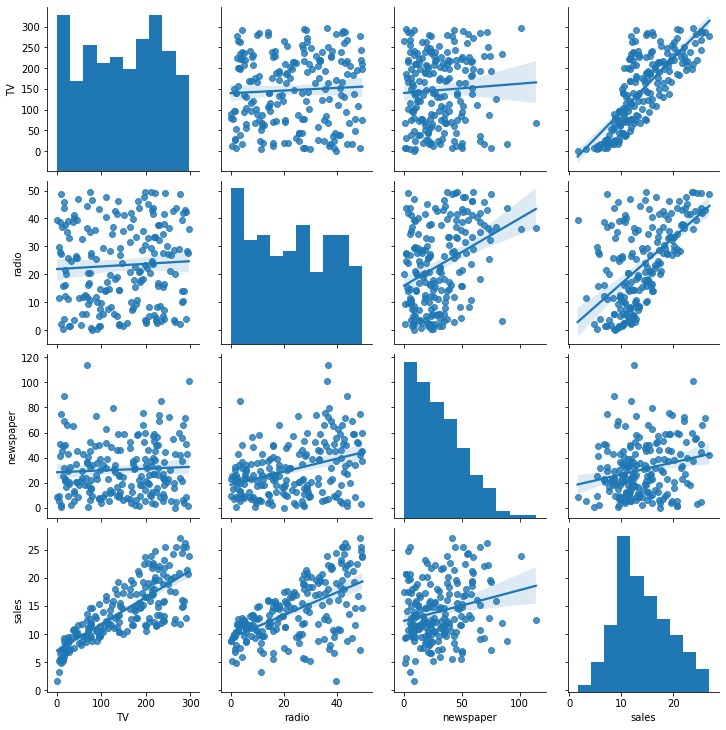

In [13]:
import seaborn as sns
sns.pairplot(df, kind="reg")

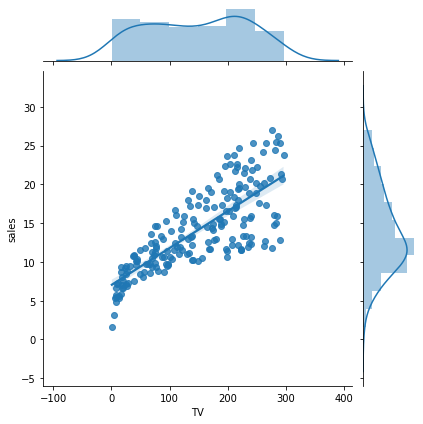

In [15]:
sns.jointplot(x ="TV", y="sales", data = df, kind="reg");

# Statsmodel İle Modelleme:

In [47]:
import statsmodels.api as sm

In [23]:
x = df[["TV"]] # bağımısız değişken
x[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


x burada tek değişkenli bir matris bunda işlem yapabilmek için bir birim matris ekliyoruz.

In [20]:
x = sm.add_constant(x)

In [21]:
x[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [24]:
y =df["sales"] # bağımlı değişken
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

# Model Kurma:

In [26]:
lm= sm.OLS(y,x)

In [27]:
model = lm.fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.897
Model:                            OLS   Adj. R-squared (uncentered):              0.896
Method:                 Least Squares   F-statistic:                              1733.
Date:                Mon, 12 Oct 2020   Prob (F-statistic):                   3.52e-100
Time:                        08:02:08   Log-Likelihood:                         -597.51
No. Observations:                 200   AIC:                                      1197.
Df Residuals:                     199   BIC:                                      1200.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0832      0.002     41.633      0.000       0.079       0.087
==============================================================================
Omnibus:                       20.228   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.930
Skew:                          -0.846   Prob(JB):                     6.36e-06
Kurtosis:                       3.086   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

r kare değeri: bağımsız değişkenin bağımlı değişkendeki değişkneliği açıklama becerisidir. Örnek için tv reklamları satışların yüzde 61 ini açıklamaktadır. Düzeltilmiş r kare değeri ise özellikle çoklu değişkenli data setlerinde şişirilmeyi önler.

f istatistiği modelin anlamlılığını ölçen test istatitiğidir. prob(f-statistic) f istatistiğinin p value değerib

bo değeri coef dir ve katsayıdır.Bu kısımda 2.tablo t isattistiği yapılır ve yüzde 95 oranında anlamlı .ıkar.

In [45]:
# ikinci yol:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           1.47e-42
Time:                        22:52:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bo değeri coef-intercept dir ve coef- tv katsayıdır.Bu kısımda 2.tablo t isattistiği yapılır ve yüzde 95 oranında anlamlı çıkar. Buradan anlaşılması gereken hiç bir şey yapılmasa da satışlar 7.03 değerinde olur tv harcamaları için artan değerde hep 0.04 katsayılıdır.

In [30]:
model.params # direkt b0 ve b1 değeri için 

Intercept    7.032594
TV           0.047537
dtype: float64

In [34]:
model.summary().tables[1] # burda yukarıdaki tabloya bak orada ilk tablo 0, ikinci 1, üçüncü 2 dir

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [35]:
model.conf_int() # katsayıların güven aralılarını bulmak için

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [36]:
 model.f_pvalue # Modelin anlamlılığına ilişkin p-value değerini görmek için:

1.4673897001947095e-42

In [40]:
print("f_pvalues:", "%.4f" % model.f_pvalue) 
# burada orta kısım ile virgülden sonra kaç hanenin gözükceğine karar verdik.

f_pvalues: 0.0000


In [48]:
model.mse_model
#hata kareler ortalamasını görmke için yukarıda satışların ortalaması 14 old. için pek de doğru değil.

3314.6181668686486

In [43]:
model.rsquared

0.611875050850071

In [44]:
# Modelin tahmin ettiği değerlere ulaşmak için
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [46]:
y[0:5] # gerçek değerler.

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [47]:
# Çoklu reg modelinni denkleminin yazılması:
print("Sales = " + str("%.2f" %model.params[0] + " +TV" + "*"+ str("%.2f" % model.params[1])))

Sales = 7.03 +TV*0.05


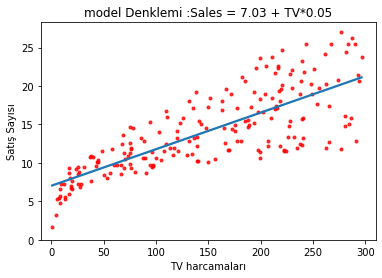

In [56]:
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"], df["sales"], ci = None, scatter_kws ={"color":"r","s":9})
g.set_title("model Denklemi :Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom = 0);           

In [60]:
from sklearn.linear_model import LinearRegression #scitleran ile model kurucaz.

In [66]:
x = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(x,y)
model.intercept_  # b0 aldık
model.coef_ # b1 katsayısını aldık.

array([[0.04753664]])

In [68]:
model.score(x,y) # r kare değeri.

0.611875050850071

In [69]:
model.predict(x)[0:10]  # Tahmin edilen değerleri görmek için

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

# Tahmin: 


model denklemi : sales = 7.03 + 0.04 *TV
Örneğin 30 birim tv harcaması olduğunda satışların tahmini değeri ne olur?

In [70]:
7.03 + 30*0.04

8.23

In [71]:
x = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(x,y)

In [72]:
model.predict([[30]])

array([[8.45869276]])

In [74]:
yeni_veri =[ [5],[90],[200]]

In [76]:
model.predict(yeni_veri)

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])

# Çoklu Doğrusal Regresyon

In [3]:
import pandas as pd
df = pd.read_csv("Advertising.csv", usecols =[1,2,3,4])
df= df.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
x = df.drop("sales", axis =1)
x.head()
y = df["sales"]

In [7]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.20, random_state =42)

her üretmede farklı değerler çıkmasın diye random state atadık.

Şimdi veri setini test ve işlem olarak iki kısma ayıracağız.

test train işlemlerini oluşturmadan önce test ve train verilerini ayrı ayrı atamak gerekir.

In [14]:
x_train.shape

(160, 3)

In [15]:
y_train.shape

(160,)

In [16]:
x_test.shape

(40, 3)

In [17]:
y_test.shape

(40,)

görüldüğü gibi datayı 80-20 şeklinde ayırmış.

In [20]:
training = df.copy()

In [21]:
training.shape

(200, 4)

# StatesModels İle:

In [22]:
import statsmodels.api as sm

In [23]:
lm =sm.OLS(y_train, x_train) 

In [24]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):                   1.28e-137
Time:                        22:25:29   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Scikit-Learn ile Model Kurma:

In [25]:
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()
model = lm.fit(x_train, y_train)
model.intercept_
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

# Tahmin :
30 br tv harcaması, 10 br radio harcamsı, 40 br de gazete harcaması olduğunda satışların tahmini değeri ne olur?

In [39]:
yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [40]:
model.predict(yeni_veri)

array([6.32334798])

In [51]:
from sklearn.metrics import mean_squared_error

In [54]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

In [55]:
rmse # eğitim hatası

3.25804820402724